In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LaTeX style plots
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
    }
plt.rcParams.update(tex_fonts)

In [242]:
# read in dataset and make datetime format on index column
df = pd.read_csv('../air_weather_data/pollution_and_weather.csv')
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %H:%M')
df = df.set_index('Date')

# Define a plot function

In [243]:
# plot function for time series
def plot_time_series(df, row, cols, figsize, annot=False, savefig=False, fig_path=None):

    fig, axes = plt.subplots(row, cols, constrained_layout = True, figsize = figsize)
    # now 12 possible labels
    annots = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)'] 
    j = 0
    for i, ax in enumerate(fig.axes):
        df.iloc[:, j].plot(ax = ax, linewidth = .75) # linewidth default = 1.5
        ax.set_xlabel('')
        # set y label on plots with even index 
        if j%2 == 0:
            ax.set_ylabel('$\mu$g/m$^3$')
        ax.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)
        if annot:
            ax.annotate(annots[i], xy=(0.0, 1.09), xycoords="axes fraction")
        j += 1
    if savefig:
        plt.savefig(fig_path)

# Make time series plots of PM2.5 and PM10

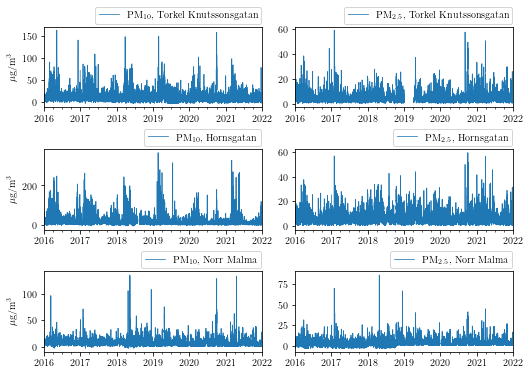

In [244]:
df_temp = df[['PM$_{10}$, Torkel Knutssonsgatan', 
              'PM$_{2.5}$, Torkel Knutssonsgatan',
            #   'Torkel Knutssonsgatan, NO$_2$',
              'PM$_{10}$, Hornsgatan', 
              'PM$_{2.5}$, Hornsgatan',
              'PM$_{10}$, Norr Malma', 
              'PM$_{2.5}$, Norr Malma'
              ]]

df_temp = df_temp['2016-01-01 00:00:00':]

plot_time_series(df_temp, row=3, cols=2, figsize=(7.25, 5.1), annot=False, savefig=False, fig_path='../plots/time_series_plots.pdf')
# plot_time_series(df_temp, row=6, cols=1, figsize=(5, 8.5), savefig=True, fig_path='../plots/time_series_plots_7.pdf')

# Make plots of sine day and cosine day signals

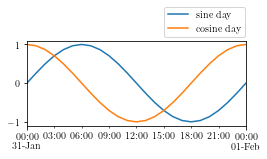

In [245]:
fig, ax1 = plt.subplots(constrained_layout = True, figsize = (3.6, 2.1))
df['2016-01-31 00:00:00':'2016-02-01 00:00:00'][['sine day', 'cosine day']].plot(ax=ax1)
plt.xlabel('')
plt.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
# plt.savefig('../plots/time_signals.pdf')

# Interpolate missing data points and remove negative values

In [246]:
# count NaN values
np.sum(df.isna());

In [247]:
# all pollution data is linarly interpolated
df[df.columns[0:7]] = df[df.columns[0:7]].interpolate()

# weather data is filled with mean linear interpolation OR mean imputation (depending on the look of the time series)
df['Temperature'] = df['Temperature'].interpolate()
df['Atmospheric pressure'] = df['Atmospheric pressure'].fillna(df['Atmospheric pressure'].mean())
df['Relative humidity'] = df['Relative humidity'].interpolate()
df['Precipitation'] = df['Precipitation'].interpolate()
df['Solar radiation'] = df['Solar radiation'].interpolate()
df['Wind speed'] = df['Wind speed'].fillna(df['Wind speed'].mean())

In [248]:
# check for no NaNs left
np.sum(df.isna())

NO$_2$, Torkel Knutssonsgatan        0
PM$_{10}$, Torkel Knutssonsgatan     0
PM$_{2.5}$, Torkel Knutssonsgatan    0
PM$_{10}$, Hornsgatan                0
PM$_{2.5}$, Hornsgatan               0
PM$_{10}$, Norr Malma                0
PM$_{2.5}$, Norr Malma               0
Temperature                          0
Atmospheric pressure                 0
Relative humidity                    0
Precipitation                        0
Solar radiation                      0
Wind speed                           0
sine day                             0
cosine day                           0
sine week                            0
cosine week                          0
sine year                            0
cosine year                          0
dtype: int64

In [249]:
# among pollutants there are now no values below zero
np.sum(df < 0)

NO$_2$, Torkel Knutssonsgatan            0
PM$_{10}$, Torkel Knutssonsgatan       887
PM$_{2.5}$, Torkel Knutssonsgatan      158
PM$_{10}$, Hornsgatan                   78
PM$_{2.5}$, Hornsgatan                   0
PM$_{10}$, Norr Malma                  102
PM$_{2.5}$, Norr Malma                3818
Temperature                           8246
Atmospheric pressure                     0
Relative humidity                        0
Precipitation                            0
Solar radiation                          0
Wind speed                               0
sine day                             30683
cosine day                           30685
sine week                            30659
cosine week                          30669
sine year                            30680
cosine year                          30681
dtype: int64

# Make correlation matrix with imputed and remvoed NaN values

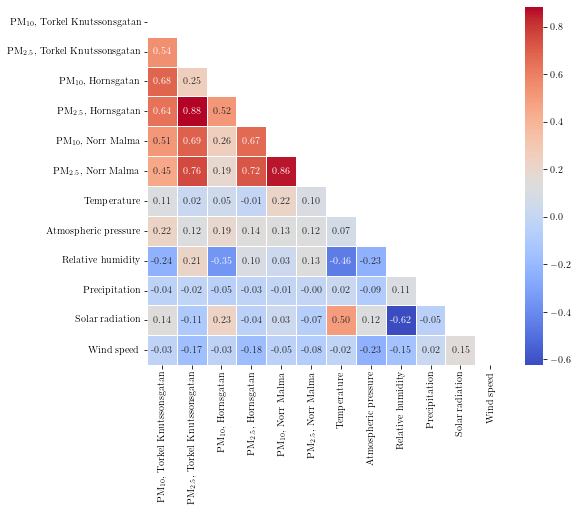

In [250]:
df_corr = df[['PM$_{10}$, Torkel Knutssonsgatan', 
              'PM$_{2.5}$, Torkel Knutssonsgatan',
              'PM$_{10}$, Hornsgatan', 
              'PM$_{2.5}$, Hornsgatan',
              'PM$_{10}$, Norr Malma', 
              'PM$_{2.5}$, Norr Malma',
              'Temperature',
              'Atmospheric pressure',
              'Relative humidity',
              'Precipitation',
              'Solar radiation',
              'Wind speed']]

mat = df_corr.corr()
mask = np.triu(np.ones_like(mat, dtype=bool))
fig, ax = plt.subplots(figsize = (8,7), constrained_layout = True)
ax = sns.heatmap(mat, mask=mask, annot = True, linewidths=0.5, fmt = ".2f", square=True, cmap='coolwarm')

# plt.savefig('../plots/correlation_matrix_imputed.pdf')

# Save new dataset to csv

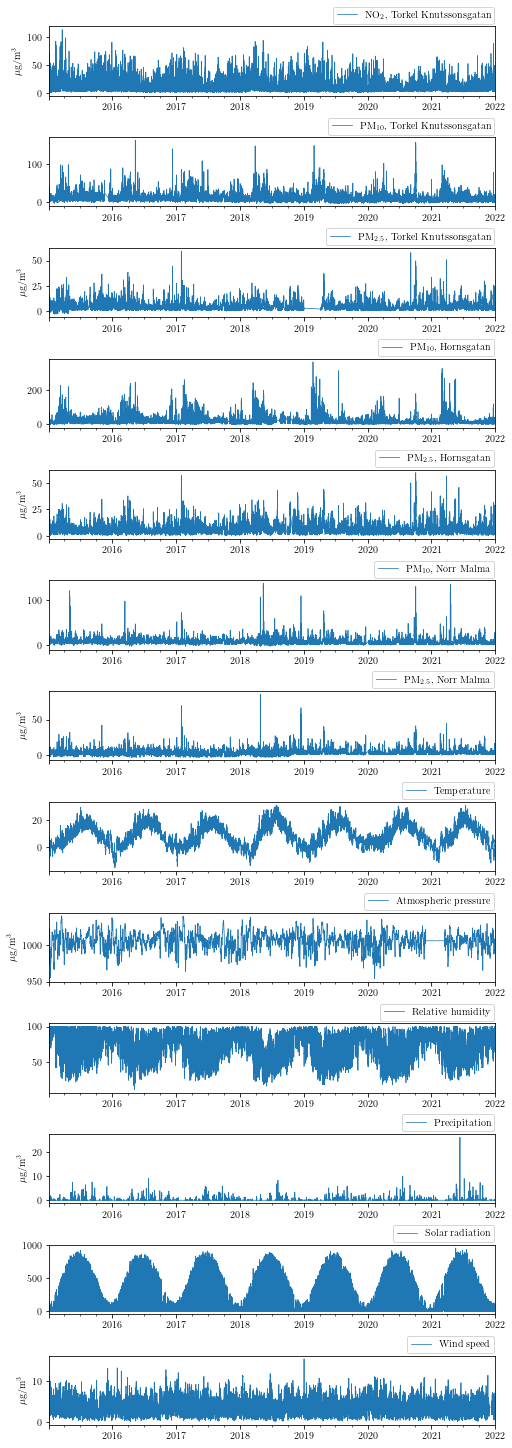

In [252]:
# plots of updated dataset 
plot_time_series(df, row=13, cols=1, figsize=(7, 20));

# save to csv
# df.to_csv('../air_weather_data/pollution_and_weather_cleaned.csv')